In [1]:
import cv2
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np
from sklearn.model_selection import train_test_split

from torch.utils.data import DataLoader
from torchvision import transforms

import config
from dataset import OCRDataset
import utils

In [2]:
selected_annotation_list, index_to_utf16 = utils.prepare_selected_annotation_from_dataset_indexes([6, 12])
train_annotation_list, validation_annotation_list = train_test_split(selected_annotation_list,
                                                                     test_size=0.2,
                                                                     random_state=config.RANDOM_SEED)

In [3]:
tf = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
train_dataset = OCRDataset(train_annotation_list, transform=tf)
validation_dataset = OCRDataset(validation_annotation_list, transform=tf)

batchsize = 32
train_loader = DataLoader(train_dataset, batch_size=batchsize, shuffle=True)
validation_loader = DataLoader(validation_dataset, batch_size=batchsize, shuffle=False)

In [4]:
def show_result(image, bboxes):
    color_map = ['red', 'green', 'blue', 'yellow', 'purple', 'brown', 'pink', 'cyan', 'orange', 'black']
    fig = plt.figure(figsize=(8,8))
    ax = plt.axes()
    for char_index, bboxes_per_class in enumerate(bboxes):
        confidence, center_x, center_y, width, height = bboxes_per_class
        min_x = center_x - 0.5*width
        min_y = center_y - 0.5*height
        for idx, (mx, my, w, h) in enumerate(zip(min_x, min_y, width, height)):
            if idx == 0:
                rect = patches.Rectangle(xy=(mx, my), width=w, height=h, 
                                         fill=False, edgecolor=color_map[char_index], label=index_to_utf16[char_index])
            else:
                rect = patches.Rectangle(xy=(mx, my), width=w, height=h, 
                                         fill=False, edgecolor=color_map[char_index])       
            ax.add_patch(rect)
    plt.legend(bbox_to_anchor=(1.3, 1))
    image_for_show = np.transpose(image.numpy(), [1, 2, 0])*0.5 + 0.5
    plt.imshow(image_for_show)

In [5]:
def show_result_hyper(image, bboxes):
    image_np = np.zeros((image.size(1), image.size(2), 3))
    image_np[:,:,:] = np.transpose(image.numpy(), [1, 2, 0])*0.5 + 0.5
    for char_index, bboxes_per_class in enumerate(bboxes):
        confience, center_x, center_y, width, height = bboxes_per_class
        min_x = center_x - 0.5*width
        min_y = center_y - 0.5*height
        max_x = center_x + 0.5*width
        max_y = center_y + 0.5*height
        mess = index_to_utf16[char_index]
        for minx, miny, maxx, maxy in zip(min_x, min_y, max_x, max_y):
            image_np = cv2.rectangle(image_np,
                                     (minx, miny), (maxx, maxy), (1, 0, 0), 2)
            image_np = cv2.putText(image_np, mess, (minx, miny), 0, 0.2, (0, 1, 0), 1)
    return image_np

In [7]:
train_images, train_labels = iter(train_loader).next()
validation_images, validation_labels = iter(validation_loader).next()

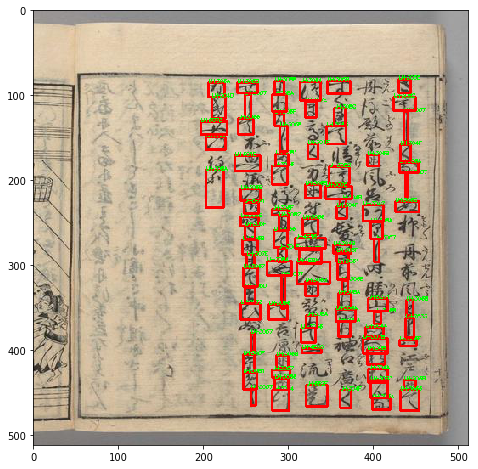

In [8]:
index = 1
image = train_images[index]
bboxes = train_dataset.label2bboxes(train_labels[index])
image_with_bboxes = show_result_hyper(image, bboxes)
plt.figure(figsize=(8,8))
plt.imshow(image_with_bboxes)

In [11]:
def draw_detection(im, bboxes, scores, cls_inds, fps, thr=0.2):
    imgcv = np.copy(im)
    h, w, _ = imgcv.shape
    for i, box in enumerate(bboxes):
        if scores[i] < thr:
            continue
        cls_indx = int(cls_inds[i])
        box = [int(_) for _ in box]
        thick = int((h + w) / 300)
        cv2.rectangle(imgcv,
                      (box[0], box[1]), (box[2], box[3]),
                      colors[cls_indx], thick)
        mess = '%s: %.3f' % (labels[cls_indx], scores[i])
        cv2.putText(imgcv, mess, (box[0], box[1] - 7),
                    0, 1e-3 * h, colors[cls_indx], thick // 3)
        if fps >= 0:
            cv2.putText(imgcv, '%.2f' % fps + ' fps', (w - 160, h - 15), 0, 2e-3 * h, (255, 255, 255), thick // 2)


In [12]:
train_images, train_labels = iter(train_loader).next()
validation_images, validation_labels = iter(validation_loader).next()

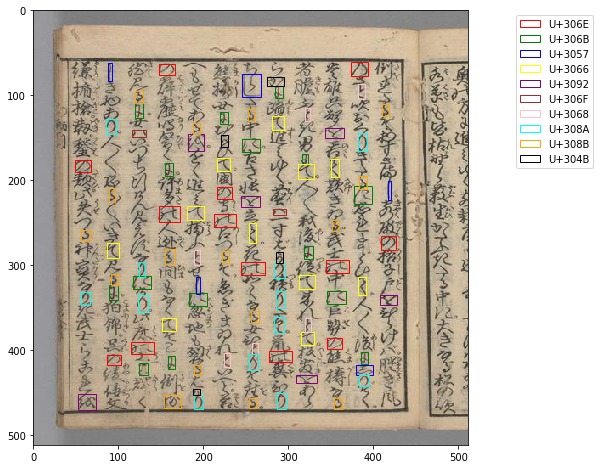

In [39]:
index = 1
image = train_images[index]
bboxes = train_dataset.label2bboxes(train_labels[index])
show_result(image, bboxes)

In [234]:
'306E'.encode('unicode-escape')

b'306E'

In [240]:
(('\\u' + '306E').encode()).decode('unicode-escape')

'の'

In [227]:
'の'.encode('unicode-escape')

b'\\u306e'

In [225]:
'afd'.replace(b, '\u')

SyntaxError: (unicode error) 'unicodeescape' codec can't decode bytes in position 0-1: truncated \uXXXX escape (<ipython-input-225-38fe106a9d5f>, line 1)

In [179]:
print('\u306E')

の


In [197]:
'U+306E'.encode('utf-16').hex()

'fffe55002b003300300036004500'

In [213]:
'の'.encode('utf-16').hex()

'fffe6e30'

In [220]:
bool('fffe6e30')

True

In [194]:
b'U+306E'

b'U+306E'

In [196]:
'306E'.bin()

AttributeError: 'str' object has no attribute 'bin'